# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

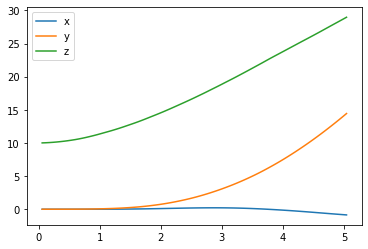

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

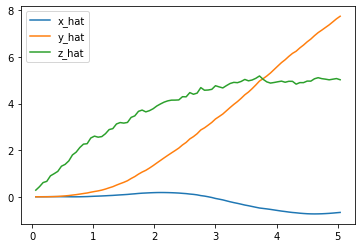

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

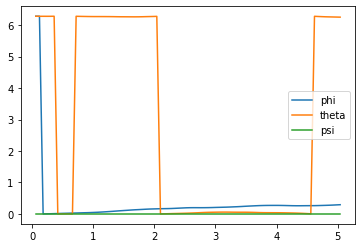

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

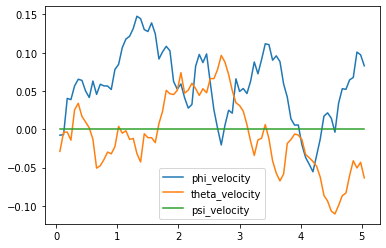

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

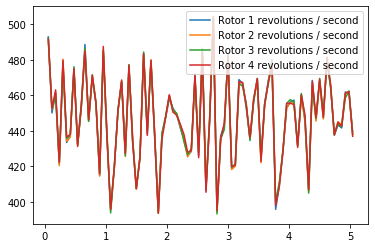

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-0.85877311 14.44102602 28.97066634  0.29252814  6.25413944  0.        ]
[-0.67182689  7.74989697  5.02427267]
[ 0.08297912 -0.06338835  0.        ]


In the cell bellow, there's a 3D representation of the drone's trajectory

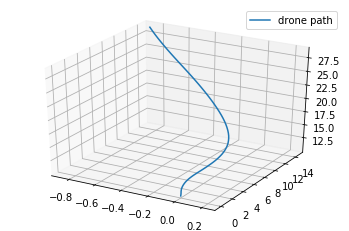

In [9]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')
z = results['z']
x = results['x']
y = results['y']
ax.plot(x, y, z, label='drone path')
ax.legend()

In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [10]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([10., 10., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode =  932, score =   2.270 (best =   2.276), noise_scale = 3.255

/home/barbosa/Repositories/quadcop-training/physics_sim.py:131: RuntimeWarning: overflow encountered in multiply
  angles = self.pose[3:] + self.angular_v * self.dt + 0.5 * self.angular_accels * self.angular_accels * self.dt ** 2
/home/barbosa/Repositories/quadcop-training/physics_sim.py:132: RuntimeWarning: invalid value encountered in remainder
  angles = (angles + 2 * np.pi) % (2 * np.pi)
/home/barbosa/Repositories/quadcop-training/physics_sim.py:90: RuntimeWarning: overflow encountered in multiply
  drag_moment =  self.C_d * 0.5 * self.rho * self.angular_v * np.absolute(self.angular_v) * self.areas * self.dims * self.dims
/home/barbosa/Repositories/quadcop-training/physics_sim.py:133: RuntimeWarning: invalid value encountered in add
  self.angular_v = self.angular_v + self.angular_accels * self.dt


Episode = 1000, score =   2.269 (best =   2.276), noise_scale = 3.2

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [12]:
%reload_ext autoreload
%autoreload 2

## TODO: Train your agent here.
import sys
import pandas as pd
from agents.agent import Agent
from task import Task 

num_episodes = 1000
best_score = -100
target_pos = np.array([0., 0., 100.])
task = Task(target_pos=target_pos)
agent = Agent(task) 

rewards = []
stats = {}

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    score = 0
    
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        score += reward
        best_score = max(best_score, score)
             
        if done:
            print("\r{:4d}. score: {:8.3f} best: {:8.3f} pos: ({:8.2f},{:8.2f},{:8.2f})".format(
                i_episode, 
                score, 
                best_score,
                task.sim.pose[0],
                task.sim.pose[1],
                task.sim.pose[2]))

            break

    rewards.append(score)
    stats[i_episode] = {'Reward':score,'Action':action,
                        'x': task.sim.pose[0], 'y':task.sim.pose[1], 'z': task.sim.pose[2]}
    sys.stdout.flush()

   1. score:   86.684 best:   86.684 pos: (   -0.20,   -9.95,    0.00)
   2. score:   86.684 best:   86.684 pos: (   -1.10,  -10.32,    0.00)
   3. score:   77.762 best:   86.684 pos: (   -9.00,   -4.24,    0.00)
   4. score:   64.369 best:   86.684 pos: (   -9.26,    7.58,    0.00)
   5. score:   75.556 best:   86.684 pos: (   -9.14,   -5.10,    0.00)
   6. score:   88.818 best:   88.818 pos: (  -13.43,    0.61,    0.00)
   7. score:   55.549 best:   88.818 pos: (   -5.72,    0.32,    0.00)
   8. score:   66.686 best:   88.818 pos: (   -0.33,   -4.45,    0.00)
   9. score:   64.419 best:   88.818 pos: (   -5.69,   -3.60,    0.00)
  10. score:   44.430 best:   88.818 pos: (   -5.87,    1.62,    0.00)
  11. score:   55.504 best:   88.818 pos: (  -10.35,   -2.05,    0.00)
  12. score:   51.094 best:   88.818 pos: (   -4.73,   -2.32,    0.00)
  13. score:   64.471 best:   88.818 pos: (   -1.17,    0.70,    0.00)
  14. score:   46.672 best:   88.818 pos: (   -0.52,   -2.78,    0.00)
  15. 

 117. score:   39.977 best:  187.539 pos: (    1.53,  -10.10,    0.00)
 118. score:   44.397 best:  187.539 pos: (    1.62,  -13.38,    0.00)
 119. score:   48.813 best:  187.539 pos: (    2.19,  -16.22,    0.00)
 120. score:   42.186 best:  187.539 pos: (    1.78,  -11.66,    0.00)
 121. score:   44.390 best:  187.539 pos: (    2.66,  -13.64,    0.00)
 122. score:   42.191 best:  187.539 pos: (    1.24,  -11.44,    0.00)
 123. score:   37.769 best:  187.539 pos: (    0.22,   -6.17,    0.00)
 124. score:   37.763 best:  187.539 pos: (    2.11,   -7.29,    0.00)
 125. score:   35.549 best:  187.539 pos: (    1.80,   -6.53,    0.00)
 126. score:   35.546 best:  187.539 pos: (    2.72,   -6.98,    0.00)
 127. score:   35.552 best:  187.539 pos: (    0.61,   -4.81,    0.00)
 128. score:   35.549 best:  187.539 pos: (    1.83,   -6.27,    0.00)
 129. score:   35.547 best:  187.539 pos: (    2.42,   -6.76,    0.00)
 130. score:   35.552 best:  187.539 pos: (    0.79,   -4.86,    0.00)
 131. 

 233. score:  189.148 best:  189.420 pos: (   12.43,   18.03,  138.83)
 234. score:  188.853 best:  189.420 pos: (  -26.95,  -40.69,  125.46)
 235. score:  188.774 best:  189.420 pos: (   29.41,  -38.79,  134.24)
 236. score:  189.398 best:  189.420 pos: (  -15.93,    6.24,  137.08)
 237. score:  189.402 best:  189.420 pos: (  -20.03,    0.10,  136.27)
 238. score:  188.693 best:  189.420 pos: (   28.72,  -57.38,  139.05)
 239. score:  188.531 best:  189.420 pos: (   38.57,   33.07,  139.18)
 240. score:  189.365 best:  189.420 pos: (  -11.80,   14.69,  138.08)
 241. score:  189.202 best:  189.420 pos: (  -39.22,    1.12,  129.87)
 242. score:  189.115 best:  189.420 pos: (   23.67,  -13.51,  136.92)
 243. score:  179.369 best:  189.420 pos: (   73.87, -141.11,  300.00)
 244. score:  189.091 best:  189.420 pos: (  -41.17,   -8.69,  128.44)
 245. score:  189.196 best:  189.420 pos: (    6.82,   26.21,  141.54)
 246. score:  189.115 best:  189.420 pos: (   18.95,  -30.78,  133.83)
 247. 

 349. score:   46.635 best:  189.420 pos: (   -0.28,  -10.54,    0.00)
 350. score:   28.896 best:  189.420 pos: (    0.08,   -2.80,    0.00)
 351. score:   44.429 best:  189.420 pos: (    0.10,   -5.53,    0.00)
 352. score:   39.969 best:  189.420 pos: (   -0.04,  -10.46,    0.00)
 353. score:   68.766 best:  189.420 pos: (   -5.51,  -15.97,    0.00)
 354. score:   35.566 best:  189.420 pos: (    0.02,    5.51,    0.00)
 355. score:   35.547 best:  189.420 pos: (    0.16,   -7.74,    0.00)
 356. score:   39.989 best:  189.420 pos: (    0.09,   -6.61,    0.00)
 357. score:   26.682 best:  189.420 pos: (   -0.01,   -1.11,    0.00)
 358. score:   42.206 best:  189.420 pos: (   -0.38,   -8.51,    0.00)
 359. score:   75.328 best:  189.420 pos: (    0.40,   11.42,    0.00)
 360. score:   35.565 best:  189.420 pos: (   -0.12,    0.85,    0.00)
 361. score:   31.114 best:  189.420 pos: (   -0.04,    3.74,    0.00)
 362. score:   86.402 best:  189.420 pos: (   -0.23,    6.14,    0.00)
 363. 

 465. score:   31.118 best:  189.420 pos: (    0.05,   -1.46,    0.00)
 466. score:   31.121 best:  189.420 pos: (    0.05,    0.42,    0.00)
 467. score:   75.380 best:  189.420 pos: (   -4.65,  -21.04,    0.00)
 468. score:   73.189 best:  189.420 pos: (    0.92,    6.03,    0.00)
 469. score:   35.569 best:  189.420 pos: (   -0.13,   -2.10,    0.00)
 470. score:   28.895 best:  189.420 pos: (   -0.01,    3.29,    0.00)
 471. score:   31.117 best:  189.420 pos: (    0.18,    4.74,    0.00)
 472. score:   28.902 best:  189.420 pos: (    0.08,   -0.08,    0.00)
 473. score:  141.891 best:  189.420 pos: (    2.72,    5.18,    0.00)
 474. score:  100.037 best:  189.420 pos: (    4.26,    1.47,    0.00)
 475. score:   44.463 best:  189.420 pos: (   -0.49,   -2.30,    0.00)
 476. score:   46.675 best:  189.420 pos: (   -0.59,   -3.44,    0.00)
 477. score:  110.687 best:  189.420 pos: (    1.98,  -31.31,    0.00)
 478. score:   82.227 best:  189.420 pos: (    6.99,   -4.71,    0.00)
 479. 

 581. score:   51.100 best:  189.420 pos: (   -0.38,   -5.44,    0.00)
 582. score:  104.257 best:  189.420 pos: (    6.21,  -28.02,    0.00)
 583. score:   28.901 best:  189.420 pos: (    0.01,    2.61,    0.00)
 584. score:   86.599 best:  189.420 pos: (   -8.06,    5.89,    0.00)
 585. score:   62.207 best:  189.420 pos: (   -0.85,    5.01,    0.00)
 586. score:   57.760 best:  189.420 pos: (   -1.91,    4.46,    0.00)
 587. score:   93.072 best:  189.420 pos: (    7.33,    1.52,    0.00)
 588. score:   55.539 best:  189.420 pos: (   -1.92,   -6.47,    0.00)
 589. score:   31.113 best:  189.420 pos: (    0.07,   -3.67,    0.00)
 590. score:  100.067 best:  189.420 pos: (   -3.46,   -4.95,    0.00)
 591. score:   46.675 best:  189.420 pos: (   -0.11,    2.90,    0.00)
 592. score:   86.361 best:  189.420 pos: (    1.38,  -36.25,    0.00)
 593. score:   68.866 best:  189.420 pos: (   -2.20,    4.32,    0.00)
 594. score:  128.535 best:  189.420 pos: (   38.18,   -7.03,    0.00)
 595. 

 697. score:  189.425 best:  189.447 pos: (  -18.71,    2.73,  136.51)
 698. score:  189.262 best:  189.447 pos: (   20.05,   -3.96,  145.10)
 699. score:  189.446 best:  189.447 pos: (  -16.14,    4.56,  138.17)
 700. score:  188.902 best:  189.447 pos: (  -26.84,   23.15,  158.82)
 701. score:  188.349 best:  189.447 pos: (   30.25,  -75.05,  108.12)
 702. score:  188.987 best:  189.447 pos: (   24.97,   17.47,  146.43)
 703. score:  189.475 best:  189.475 pos: (    4.28,    3.27,  138.80)
 704. score:  188.648 best:  189.475 pos: (   12.97,  -75.50,   97.19)
 705. score:  189.138 best:  189.475 pos: (   -9.28,  -36.04,  132.42)
 706. score:  189.139 best:  189.475 pos: (   30.38,    2.34,  135.85)
 707. score:  189.417 best:  189.475 pos: (    7.32,   12.56,  146.57)
 708. score:  189.223 best:  189.475 pos: (  -22.60,  -17.11,  134.26)
 709. score:  176.885 best:  189.475 pos: (   18.99,  150.00,  300.00)
 710. score:  189.196 best:  189.475 pos: (    5.30,   24.67,  148.09)
 711. 

 813. score:  189.096 best:  189.569 pos: (   13.68,   23.14,  140.72)
 814. score:  189.339 best:  189.569 pos: (  -10.46,  -12.80,  136.97)
 815. score:  189.586 best:  189.586 pos: (    4.46,   -2.36,  138.52)
 816. score:  188.854 best:  189.586 pos: (   16.90,  -53.19,  118.89)
 817. score:  189.514 best:  189.586 pos: (   -5.44,    0.67,  138.69)
 818. score:  188.761 best:  189.586 pos: (  -16.18,   40.65,  132.91)
 819. score:  188.811 best:  189.586 pos: (  -21.32,  -60.33,  107.21)
 820. score:  188.834 best:  189.586 pos: (   27.53,  -29.21,  136.31)
 821. score:  189.506 best:  189.586 pos: (   -1.32,    8.43,  138.26)
 822. score:  189.080 best:  189.586 pos: (    1.15,  -45.78,  131.87)
 823. score:  189.416 best:  189.586 pos: (    8.71,   -7.25,  138.28)
 824. score:  189.354 best:  189.586 pos: (   -1.20,  -18.50,  137.45)
 825. score:  189.380 best:  189.586 pos: (   -1.69,   13.22,  141.38)
 826. score:  189.351 best:  189.586 pos: (   -8.37,  -15.28,  137.53)
 827. 

 929. score:  189.119 best:  189.586 pos: (   24.67,   16.76,  150.02)
 930. score:  189.137 best:  189.586 pos: (   26.14,   -6.51,  142.60)
 931. score:  188.810 best:  189.586 pos: (  -40.79,  -20.38,  127.86)
 932. score:  188.602 best:  189.586 pos: (  -51.71,  -39.57,  113.73)
 933. score:  189.289 best:  189.586 pos: (   -3.82,  -21.53,  137.24)
 934. score:  189.143 best:  189.586 pos: (  -35.73,   -1.69,  132.14)
 935. score:  189.002 best:  189.586 pos: (  -43.45,    7.99,  127.67)
 936. score:  188.935 best:  189.586 pos: (   -5.06,   35.12,  143.62)
 937. score:  189.122 best:  189.586 pos: (   23.92,   15.02,  141.65)
 938. score:  189.280 best:  189.586 pos: (  -29.59,    1.59,  134.49)
 939. score:  188.995 best:  189.586 pos: (   -7.42,   30.65,  157.02)
 940. score:  189.274 best:  189.586 pos: (   20.93,    7.54,  143.51)
 941. score:  188.809 best:  189.586 pos: (  -30.35,   12.61,  170.01)
 942. score:  189.332 best:  189.586 pos: (    3.20,   13.84,  138.51)
 943. 

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

In [13]:
## TODO: Plot the rewards.
import matplotlib.pyplot as plt
%matplotlib inline
import re
from datetime import datetime

In [16]:
stats = pd.DataFrame(stats).T
stats = stats[['Reward','Action','x','y','z']]
stats['Action_Val'] = stats['Action'].apply(lambda x: x[0])

In [17]:
stats.index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
             991,  992,  993,  994,  995,  996,  997,  998,  999, 1000],
           dtype='int64', length=1000)

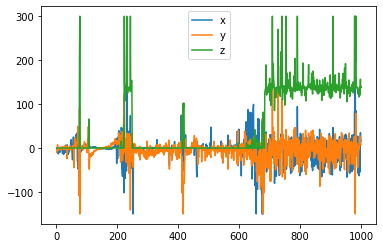

In [18]:
plt.plot(stats.index, stats['x'], label='x')
plt.plot(stats.index, stats['y'], label='y')
plt.plot(stats.index, stats['z'], label='z')
plt.legend()
_ = plt.ylim()

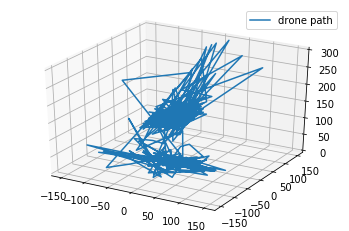

In [19]:
fig = plt.figure()
ax = fig.gca(projection='3d')
z = stats['z']
x = stats['x']
y = stats['y']
ax.plot(x, y, z, label='drone path')
ax.legend()

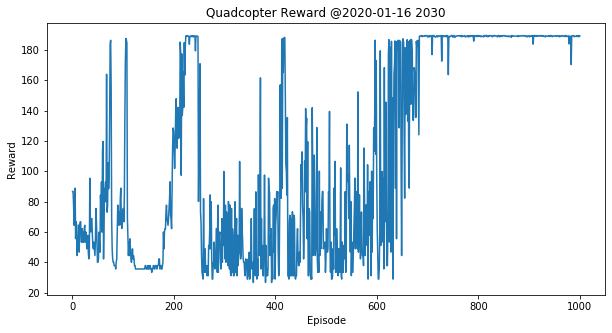

In [20]:
title = ''.join(str(datetime.now()).split(':')[:-1])

# Print reward per episode
plt.figure(figsize=(10,5))
plt.plot(stats['Reward'])
plt.title("Quadcopter Reward @{}".format(title))
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.show()

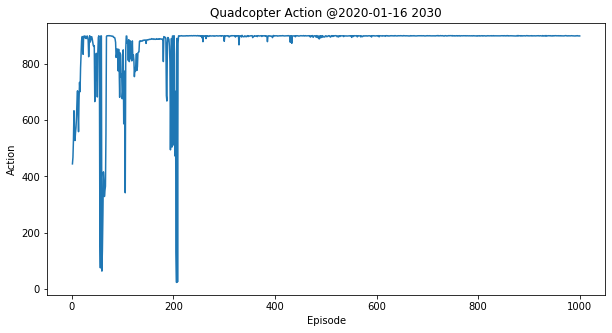

In [21]:
plt.figure(figsize=(10,5))
plt.plot(stats['Action_Val'])
plt.title("Quadcopter Action @{}".format(title))
plt.xlabel('Episode')
plt.ylabel('Action')
plt.show()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: The task chosen was the takeoff function, where the [x,y,z] training is based on achieving target coordinates of [0,0,100], representing a liftoff of 90, from an initial position of [0,0,10]. The reward function was:

reward = tanh(1 - 0.0005*((abs(current position[x,y,z] - target position[x,y,z]).sum())

In this case, the drone receives a reward of 1 in each step of each episode less a penalty based on the distance between its current location and the target location.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**: The DDPG algorithm was used in this notebook. The Actor NN consists of two layers of 400 and 300, l2 regularizer of 0.01, batch normalization and relu activation with Adam optimizer and learning rate 0.0001. 

The critic DDPG consisted of two layers of 400 and 300, l2 regularizer of 0.01, batch normalization, relu activation at each layer and Adam optimizer with learning rate 0.001. Final layer weights and biases of both actor and critic were initialized from uniform distribution [-0.003,0.003]. Gamma of 0.99 used to provide a slight preference for rewards earned now vs in the future. Regularizers and initializers were used in order to prevent vanishing and exploding gradients.

Got a part of the ideia from https://github.com/cipher813

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**: It seems that the drone sporadically achieves high rewards for a period of time and then fails again, but once again finding its feet at a later time. This is due to the explore vs exploit stochastic/probabilistic nature of the learning algorithm, where there is a slight probability that the drone explores new decisions vs sticking solely with the decision which results in maximum known reward. 

To capture this, the Ornstein-Uhlenbeck process is incorporated into the model, with theta and sigma of 0.15 and 0.2, respectively. These capture the probability that the model will explore rather than exploit. In this scenario, the final performance of the agent was consistent from episodes 200-1000 - the agent had "learned" with mean reward per episode greater than 180.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**: This was a very difficult project. There was a lot of code that needed to be understood in order to start developing the algorithm and perform a task.

I found interesting that the learning process was more inclined to have periodic large increases in reward, which seems to represent that it is based more on 'aha moments' than on a gradual increase, but then, it sticks to a value greater than 180 for a long time, with a few decreases from time to time. It looked like the drone was learning and knew that in that direction he would be rewarded but still wanted to explore options, and when these options weren't as good as the last ones, it returned to what it knew would work.